In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd
import csv

In [42]:
df=pd.read_csv("europe.csv", parse_dates = True)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,13/05/2021,13,5,2021,1179,14,Austria,AT,AUT,8901064,Europe
1,12/05/2021,12,5,2021,968,19,Austria,AT,AUT,8901064,Europe
2,11/05/2021,11,5,2021,670,16,Austria,AT,AUT,8901064,Europe
3,10/05/2021,10,5,2021,1009,11,Austria,AT,AUT,8901064,Europe
4,09/05/2021,9,5,2021,1251,14,Austria,AT,AUT,8901064,Europe


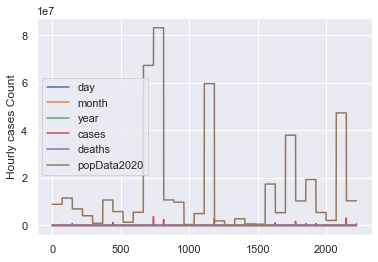

In [8]:
 
%matplotlib inline
df.plot()
plt.ylabel('Hourly cases Count');

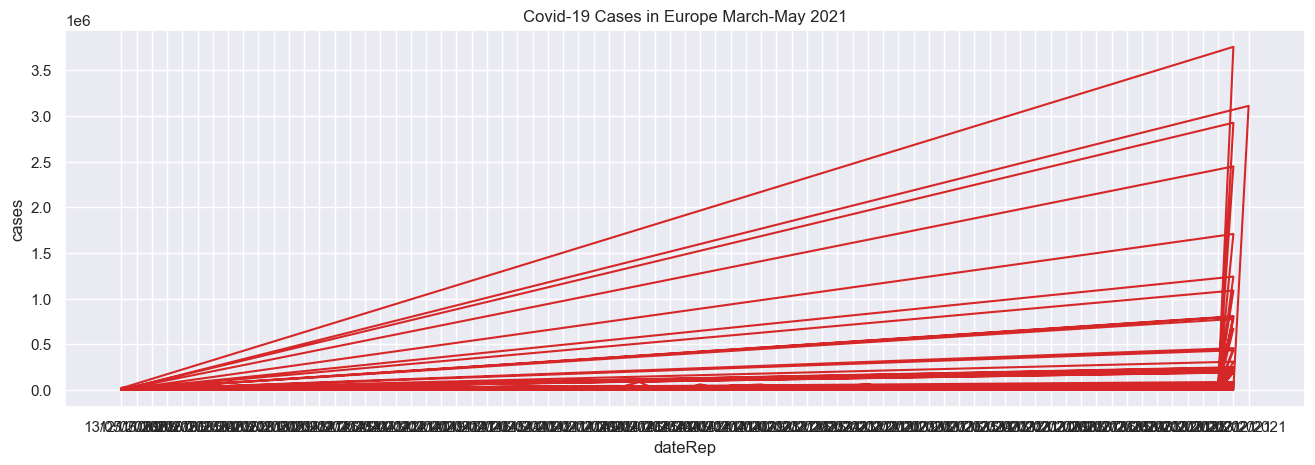

In [10]:
def plot_df(df, x, y, title="", xlabel='dateRep', ylabel='cases', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.dateRep, y=df.cases, title='Covid-19 Cases in Europe March-May 2021')    

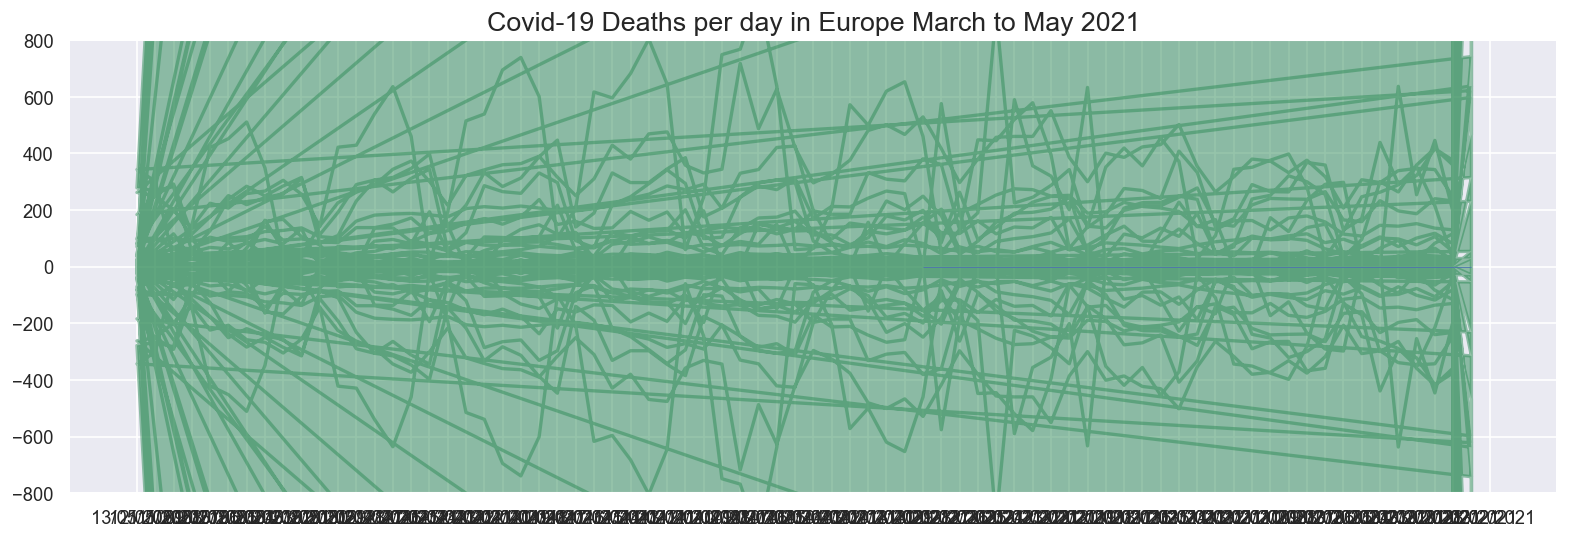

In [14]:
# Import data
x = df['dateRep'].values
y1 = df['deaths'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Covid-19 Deaths per day in Europe March to May 2021', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.dateRep), xmax=np.max(df.dateRep), linewidth=.5)
plt.show()

In [27]:
import datetime
from dateutil.parser import parse 
import seaborn as sns
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [37]:
import matplotlib as mpl
df.sort_index(inplace=True)

Text(0.5, 1.0, 'EU Covid Cases detrended by subtracting the least squares fit')

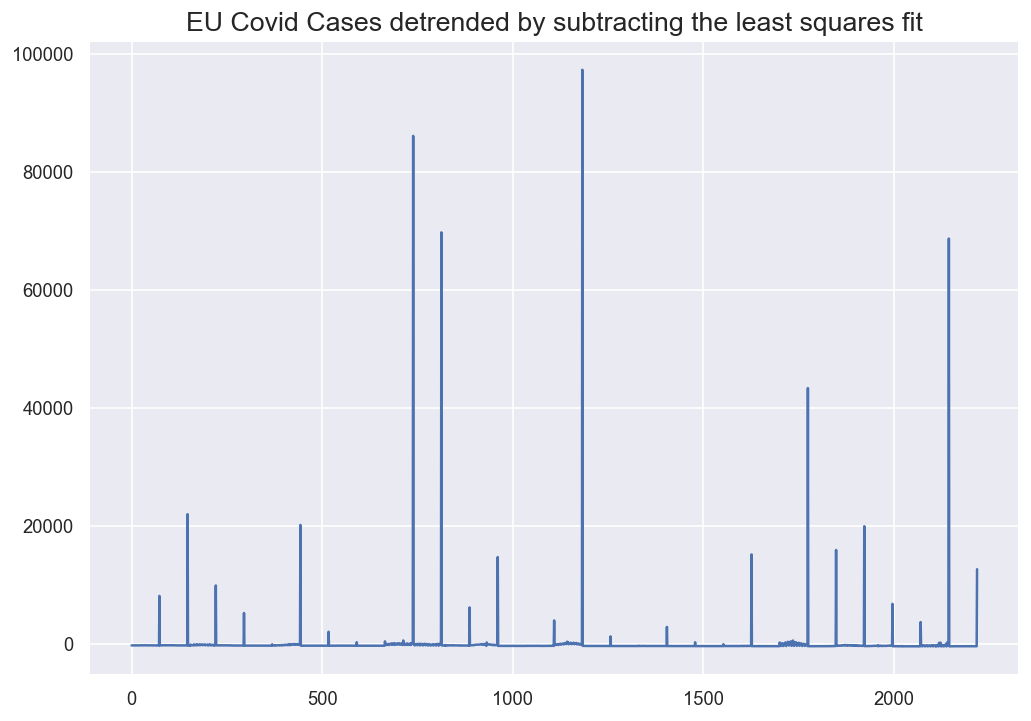

In [44]:
from scipy import signal
detrended = signal.detrend(df.deaths.values)
plt.plot(detrended)
plt.title('EU Covid deaths march to may detrended by subtracting the least squares fit', fontsize=16)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

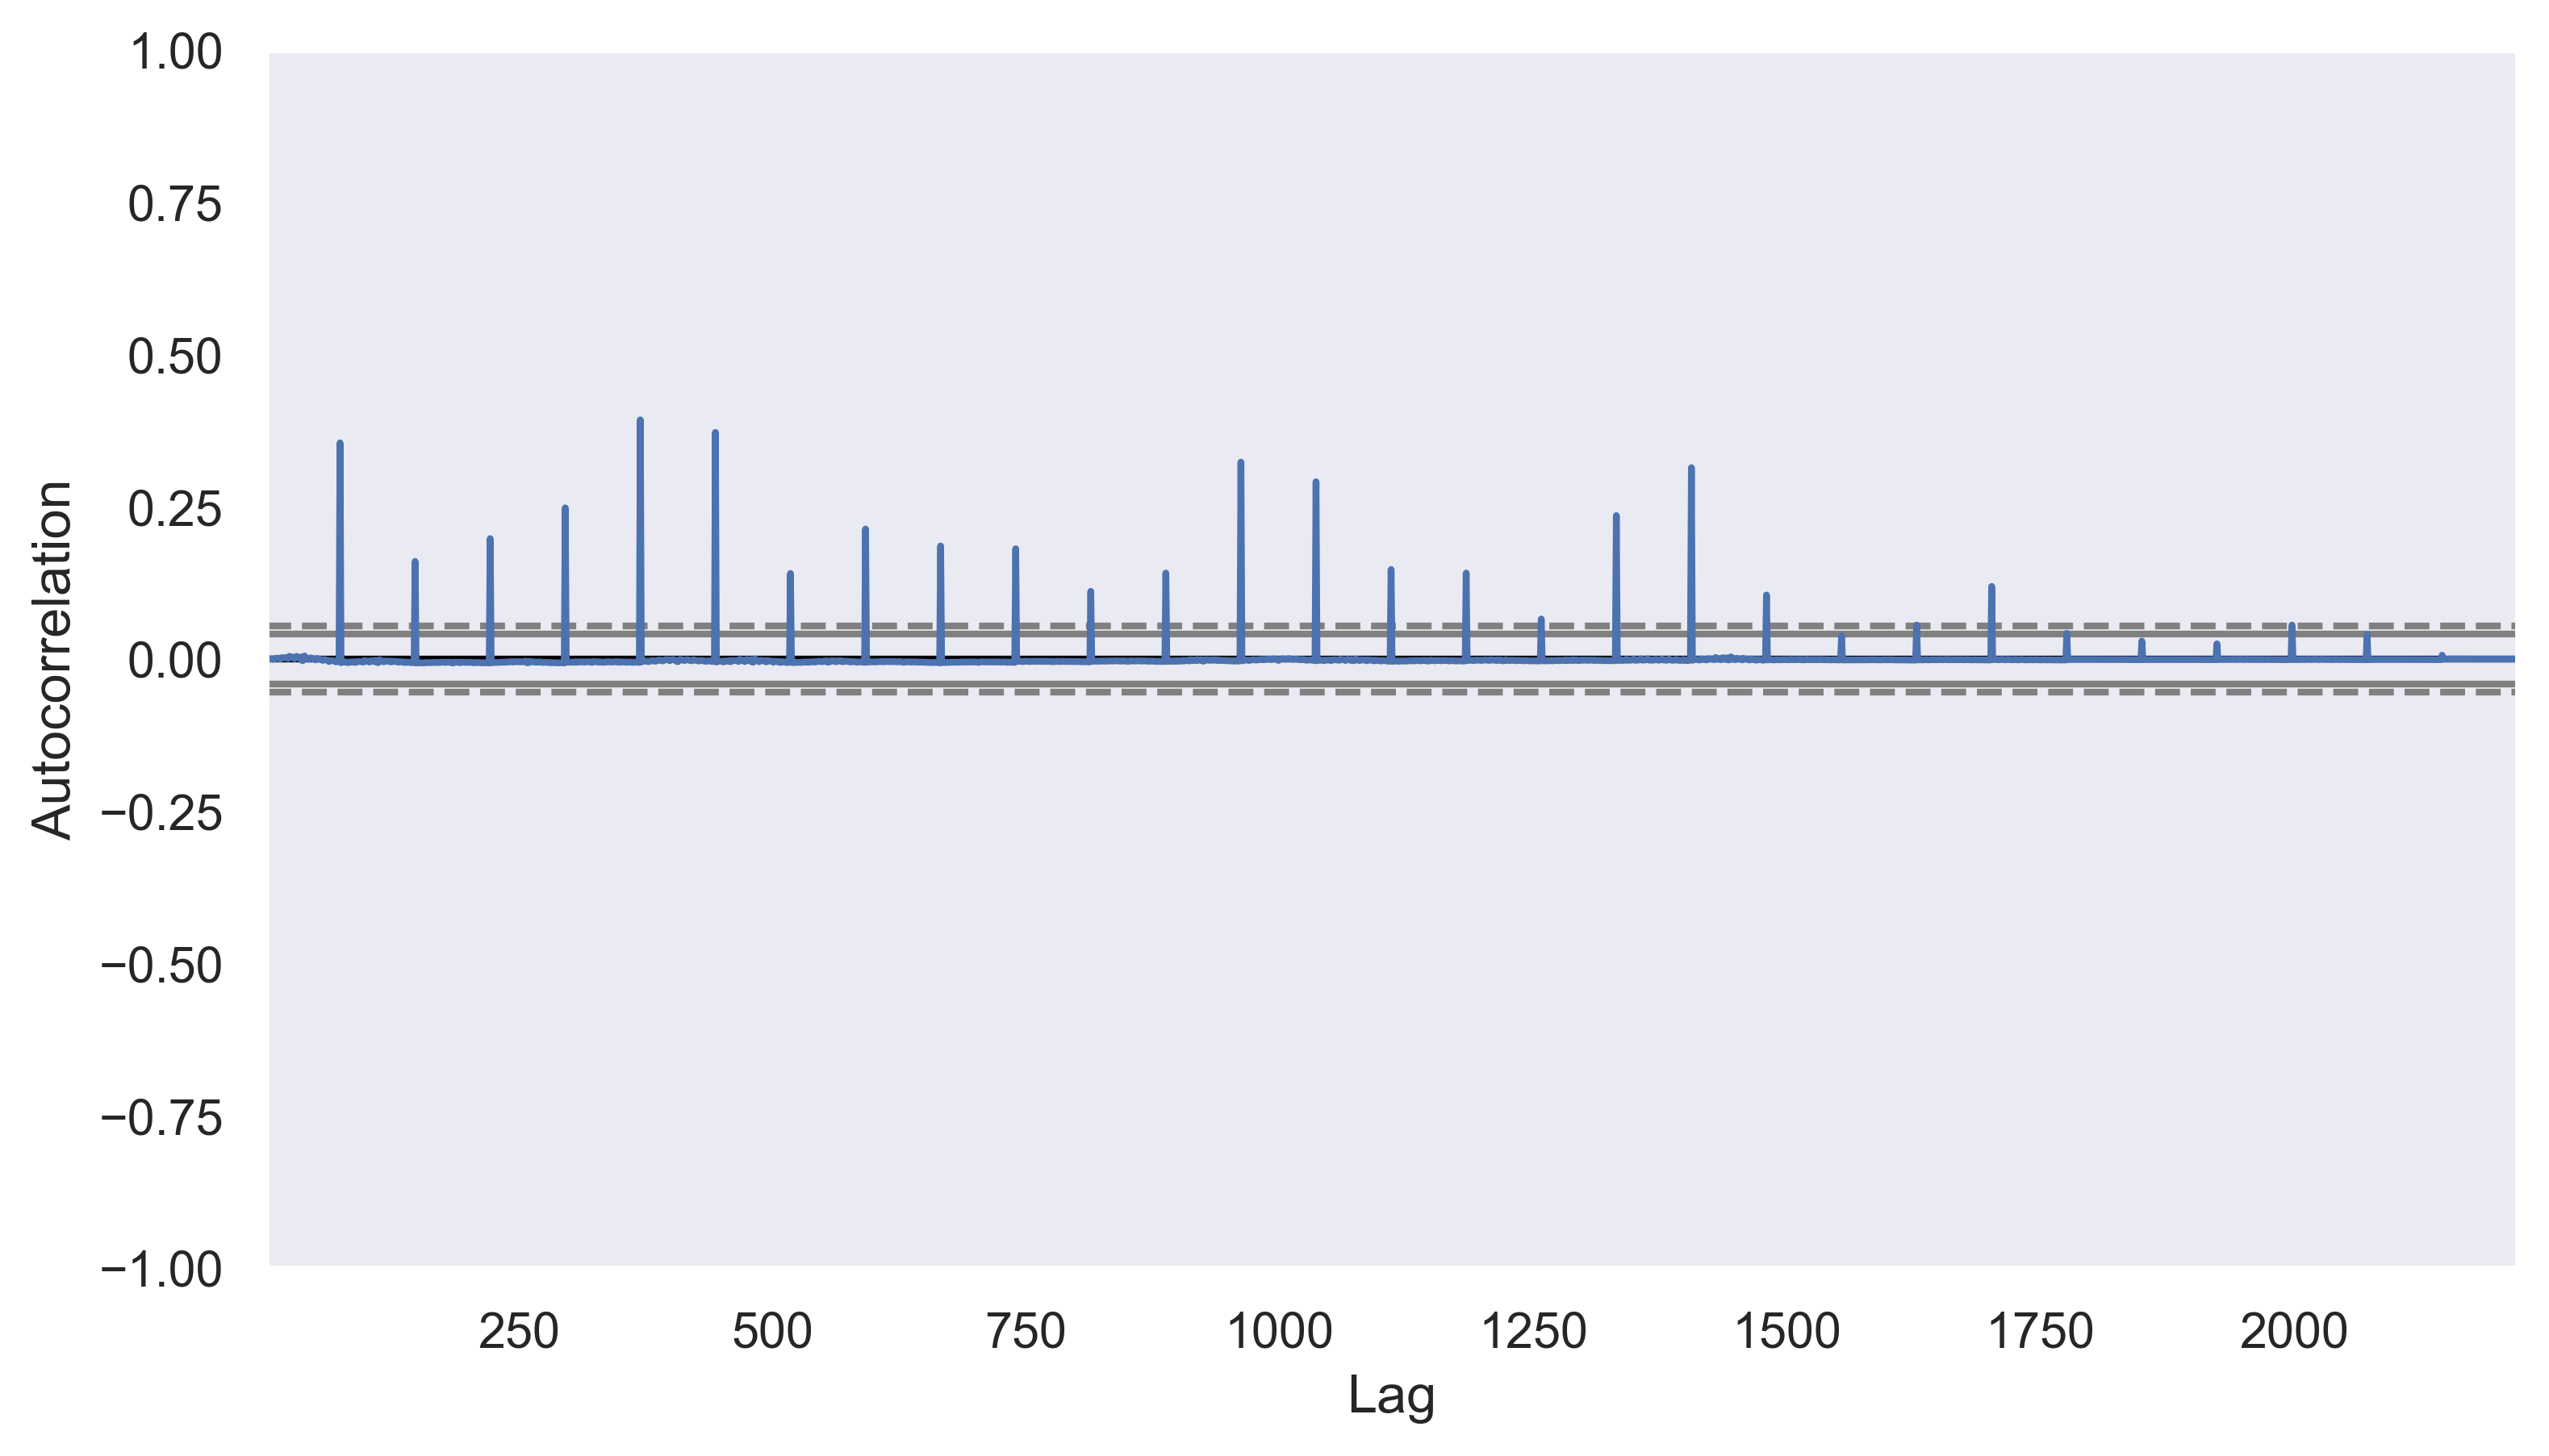

In [48]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':400})
autocorrelation_plot(df.cases.tolist())